In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
os.chdir('..')
import manifold_methods
import plotting
import mappings
import data_loader

In [3]:
metadata_path = '/lustre06/project/6065672/shared/covid-19/database/data/intra/all_filtered_iSNVs/metadata/metadata.tsv'
data_path = '/lustre06/project/6065672/shared/covid-19/database/data/intra/all_filtered_iSNVs/experiment_V2/pca_iSNVs_consensus_embeddings.tsv'

metadata = data_loader.load_metadata(metadata_path)
embeddings = data_loader.load_metadata(data_path)

merged = embeddings.merge(metadata, left_on='Unnamed: 0', right_on='sample_id')
merged['collection_date'] = pd.to_datetime(merged['collection_date'], format='%Y-%m-%d')
inputs = merged[merged.columns[['PC' in colname for colname in merged.columns]]].values

labels = data_loader.preprocess_labels_sarscov2(merged)

Calculating optimal t...
  Automatically selected t = 38
Calculated optimal t in 3.50 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.45 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.67 seconds.
Calculating optimal t...
  Automatically selected t = 40
Calculated optimal t in 3.38 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.04 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.36 seconds.
Calculating optimal t...
  Automatically selected t = 43
Calculated optimal t in 3.77 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.75 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.71 seconds.
Calculating optimal t...
  Automatically selected t = 37
Calculated optimal t in 3.39 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.37 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.25 seconds.
Calculating optimal t...
  A

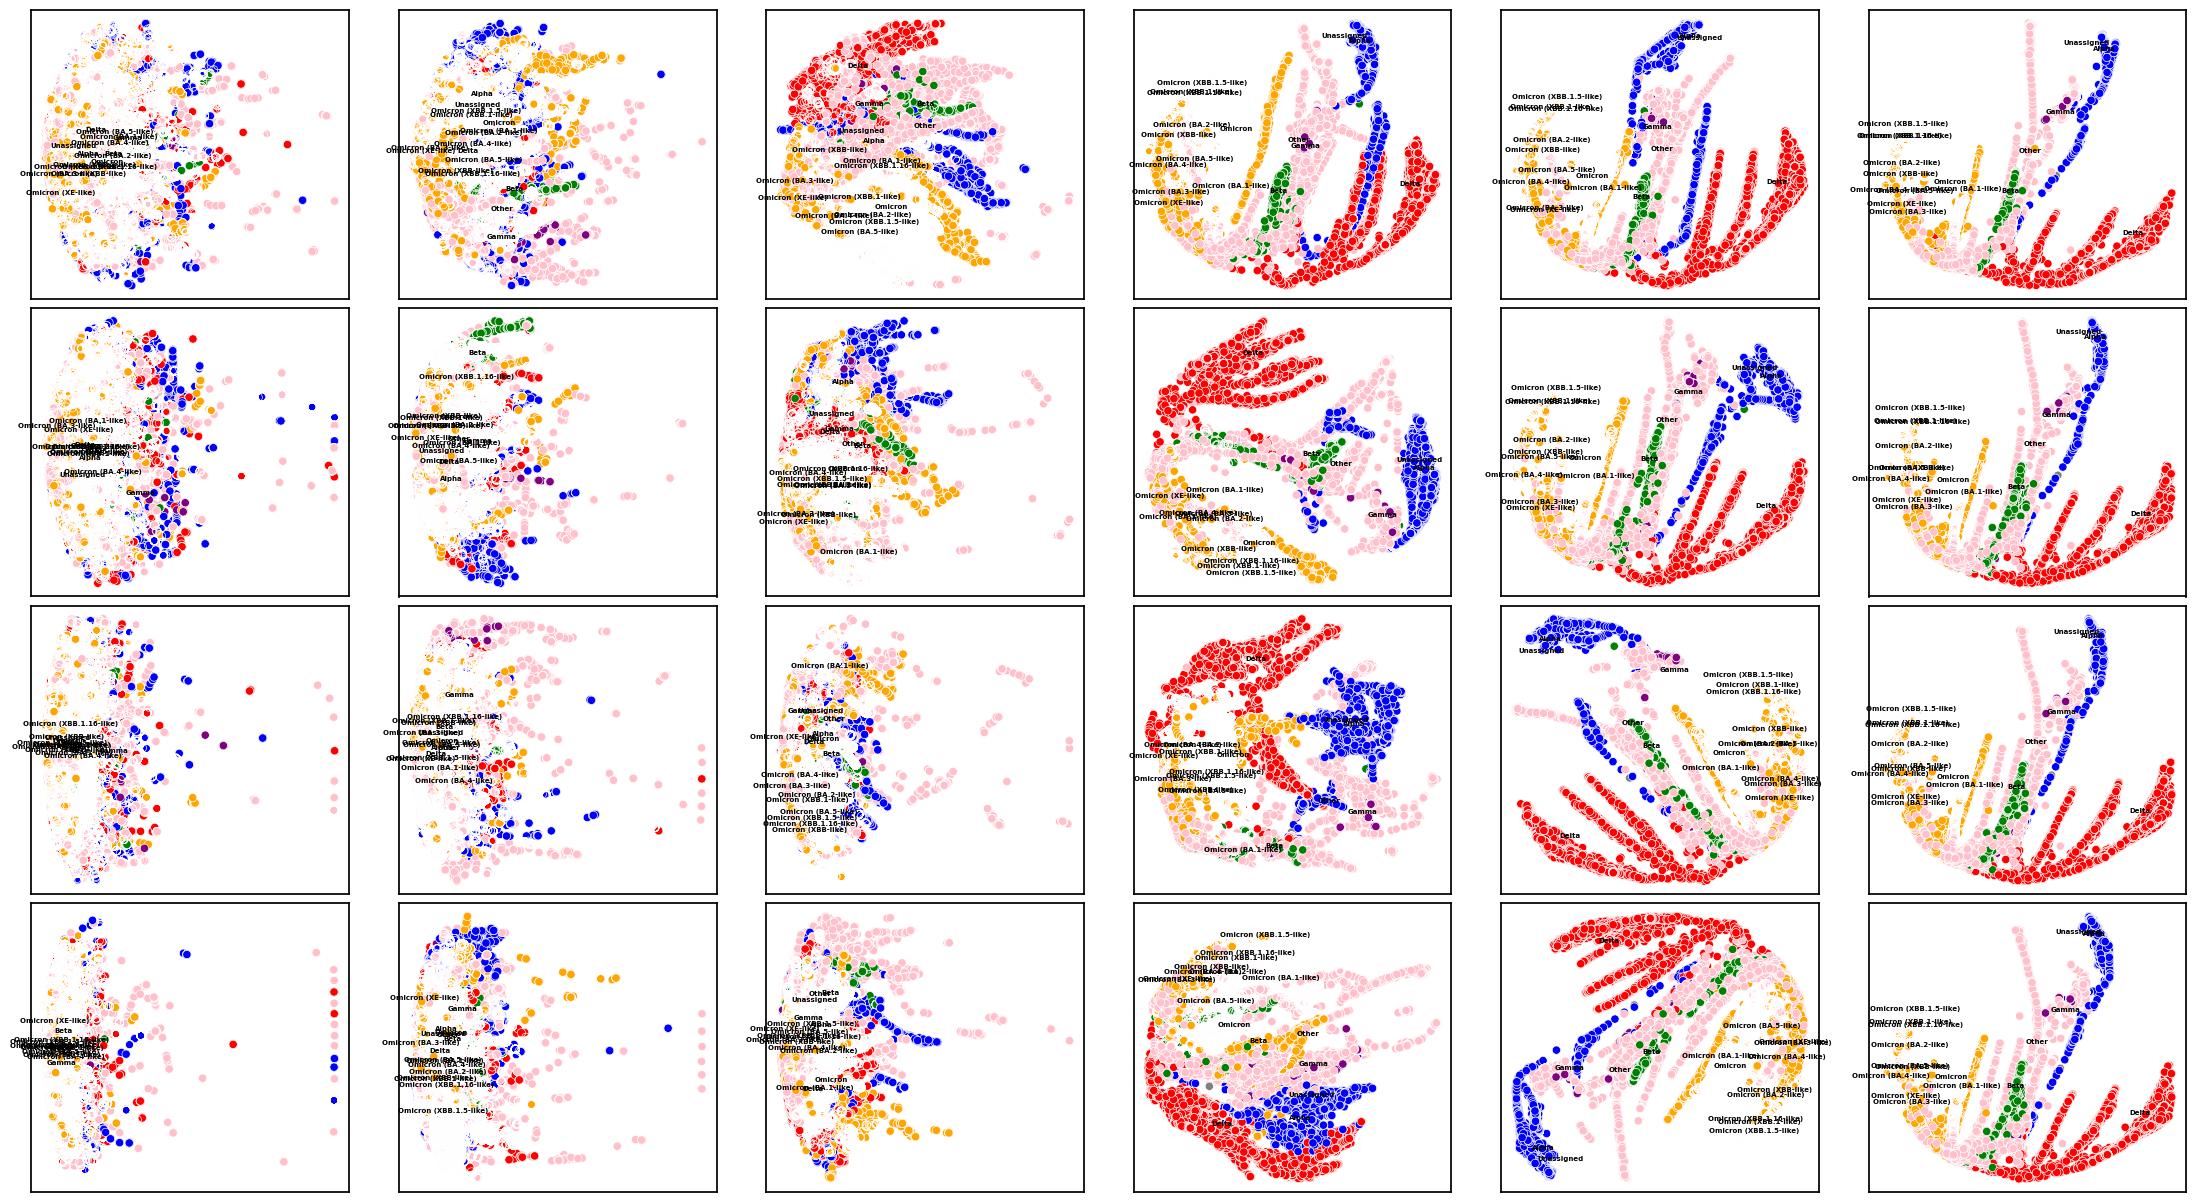

In [5]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(22,12))

decays=(10, 20, 40, 60)
knns=(5, 10, 20, 50, 100, 200)
gamma=1
label_positions=True
t='auto'

for i, decay in enumerate(decays):
    for j, knn in enumerate(knns):
        model_name, _ = plotting.generate_filenames(dataset_type='covid',
                                                    manifold_algo='phate',
                                                    decay=decay, 
                                                    knn=knn, 
                                                    gamma=gamma, 
                                                    t=t,
                                                    label_positions=label_positions)
        model_path = os.path.join('models', model_name)
        algo, transformed_data = manifold_methods.perform_phate(inputs, 
                                                                model_path,
                                                                knn=knn, 
                                                                decay=decay,
                                                                gamma=gamma,
                                                                t=t)

        plotting.plot_embeddings(transformed_data, 
                                 labels[0], 
                                 '', 
                                 mappings.pop_pallette_covid_coarse, 
                                 mappings.label_order_covid_coarse,
                                 label_positions=True,
                                 ax=ax[i,j])

fig.tight_layout()

Calculating optimal t...
  Automatically selected t = 38
Calculated optimal t in 3.52 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.43 seconds.
Calculating metric MDS...
Calculated metric MDS in 5.20 seconds.
Calculating optimal t...
  Automatically selected t = 40
Calculated optimal t in 3.32 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.03 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.30 seconds.
Calculating optimal t...
  Automatically selected t = 43
Calculated optimal t in 3.47 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.69 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.36 seconds.
Calculating optimal t...
  Automatically selected t = 37
Calculated optimal t in 3.48 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.37 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.30 seconds.
Calculating optimal t...
  A

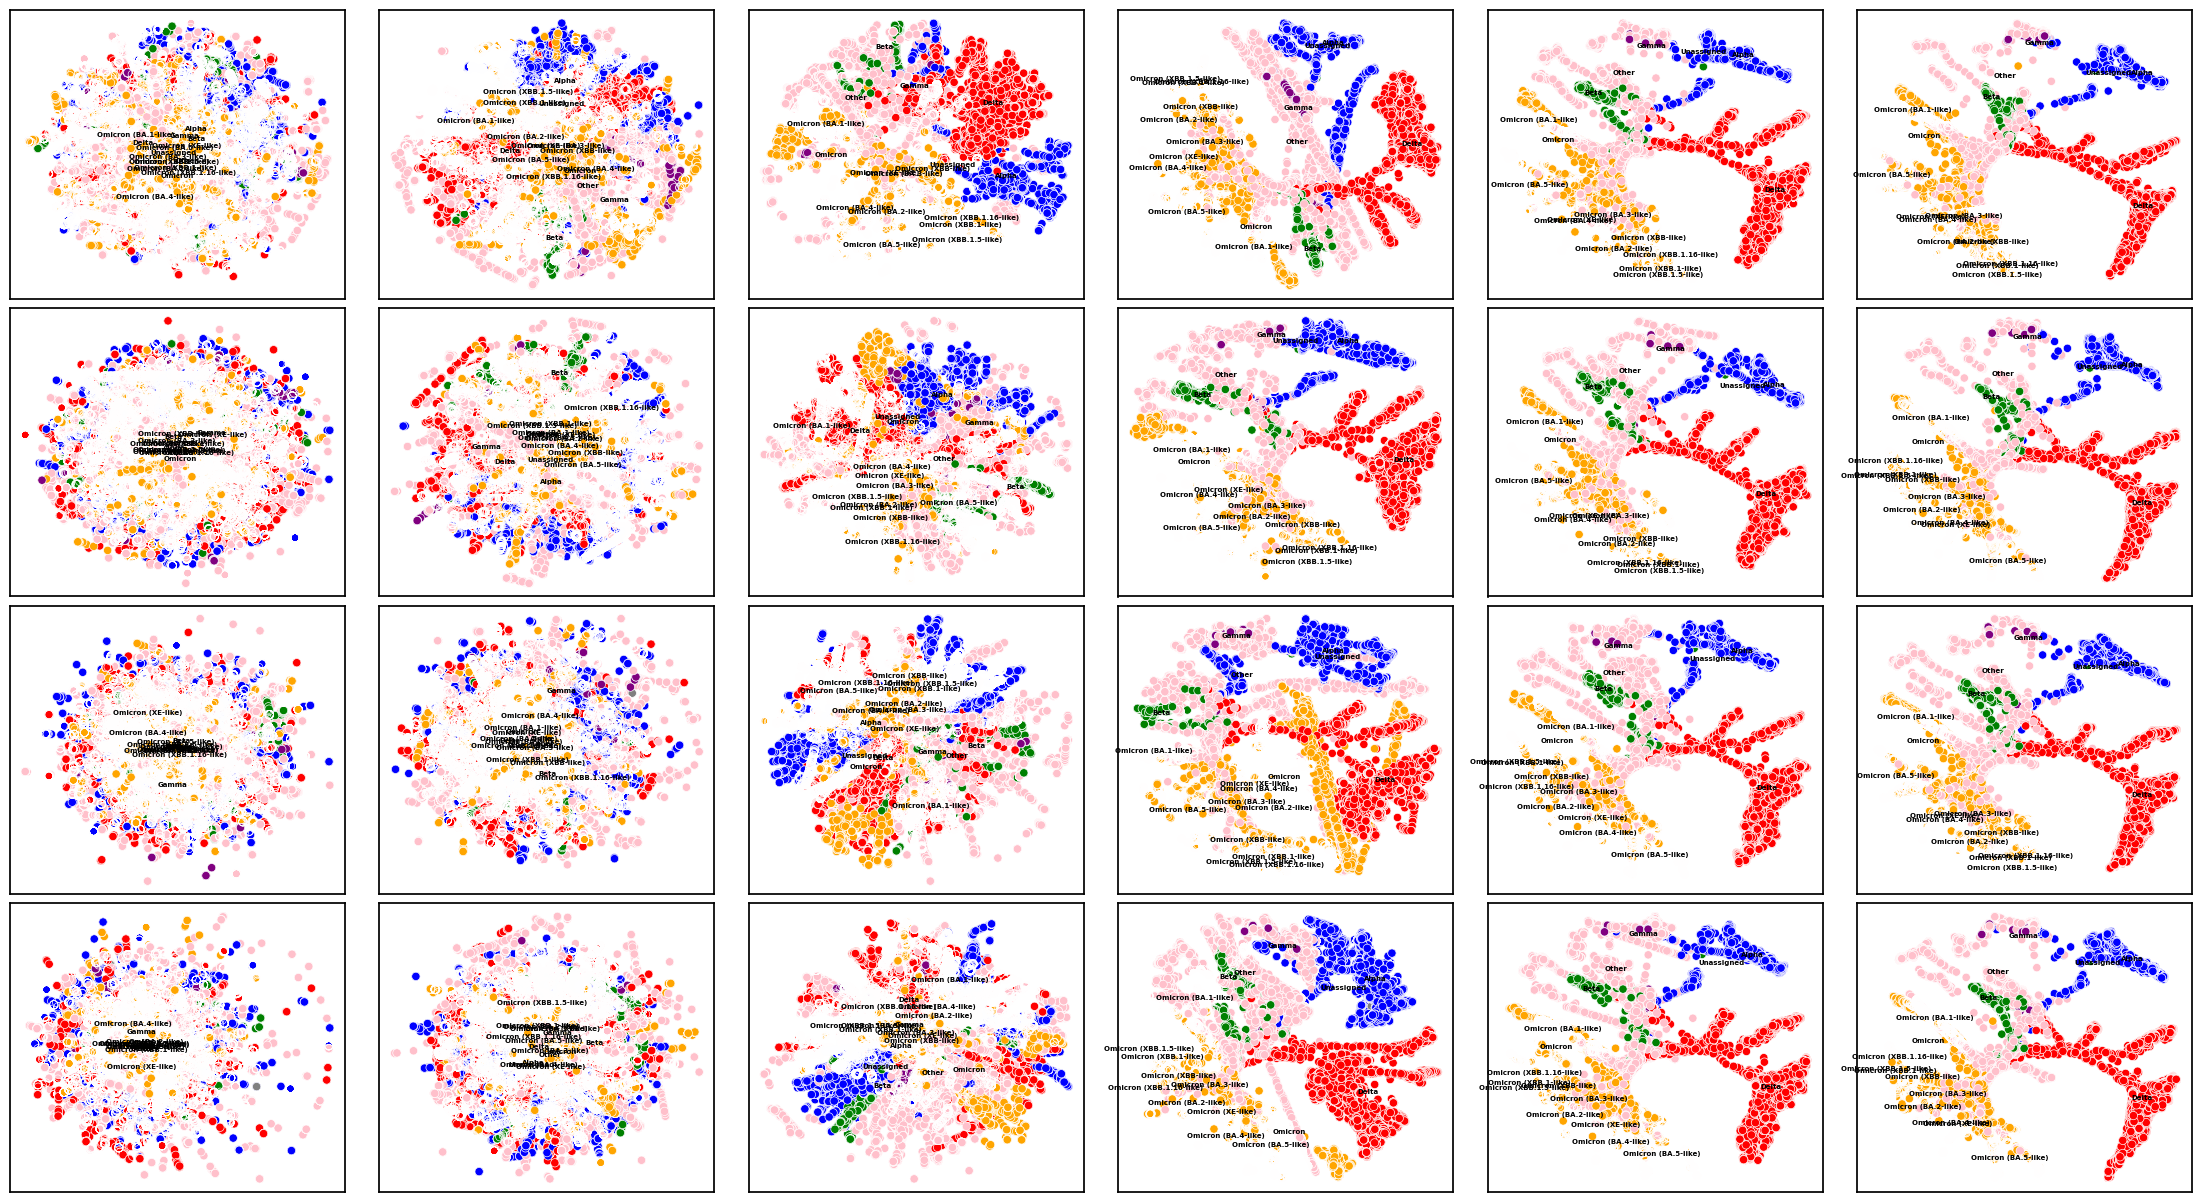

In [7]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(22,12))

decays=(10, 20, 40, 60)
knns=(5, 10, 20, 50, 100, 200)
gamma=0
label_positions=True
t='auto'

for i, decay in enumerate(decays):
    for j, knn in enumerate(knns):
        model_name, _ = plotting.generate_filenames(dataset_type='covid',
                                                    manifold_algo='phate',
                                                    decay=decay, 
                                                    knn=knn, 
                                                    gamma=gamma, 
                                                    t=t,
                                                    label_positions=label_positions)
        model_path = os.path.join('models', model_name)
        algo, transformed_data = manifold_methods.perform_phate(inputs, 
                                                                model_path,
                                                                knn=knn, 
                                                                decay=decay,
                                                                gamma=gamma,
                                                                t=t)

        plotting.plot_embeddings(transformed_data, 
                                 labels[0], 
                                 '', 
                                 mappings.pop_pallette_covid_coarse, 
                                 mappings.label_order_covid_coarse,
                                 label_positions=True,
                                 ax=ax[i,j])

fig.tight_layout()